# Ejercicio Clase 18/11/2016 - Implementacion Markov Chain Monte Carlo

In [2]:
import numpy as np
from scipy.stats import norm
import random


def target(x):
    """Target function"""
    return np.power(np.sin(x), 2) * np.power(np.sin(2 * x), 2) * norm.pdf(x)


def metropolis(x, alpha=1):
    y = random.uniform(x - alpha, x + alpha)
    if random.uniform(0, 1) > target(y) / target(x):
        y = x
    return y

In [3]:
# Run Metropolis
T = np.power(10, 5)
x = np.repeat([3.14], T)
for t in range(1, T):
    x[t] = metropolis(x[t-1])

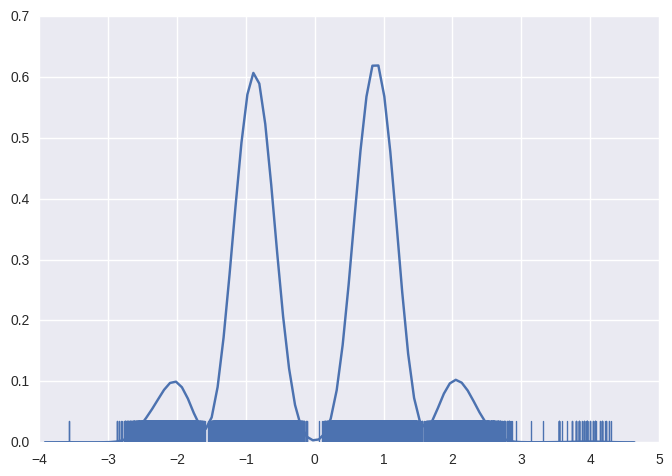

In [5]:
# Print results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

sns.distplot(x, hist=False, rug=True)

### integro la función target

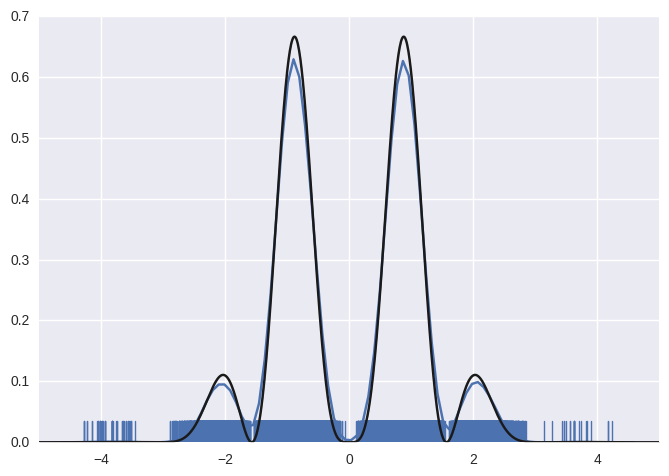

In [4]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

integration_coeficient = integrate.quad(lambda x: target(x), -100, 100)[0]
rta_x = np.linspace(-5, 5, num=1000)
rta_y = target(rta_x) * (1/integration_coeficient)

sns.distplot(x, hist=False, rug=True)
sns.tsplot(data=rta_y, time=rta_x, color="k")
sns.plt.show()